In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import warnings
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, classification_report, precision_recall_fscore_support
import itertools
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House_Rent_Dataset.csv')
house_pred_df=df.sample(frac=1,random_state=42).reset_index(drop=True)

In [ ]:
house_pred_df.shape[0]

4746

In [ ]:
test = house_pred_df.iloc[3746:,:].reset_index(drop=True)
train, valid = train_test_split(house_pred_df.iloc[:3746,:].reset_index(drop=True),test_size=0.2)

In [ ]:
train.info()
print('*'*100)
valid.info()
print('*'*100)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 3641 to 2906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          2996 non-null   object
 1   BHK                2996 non-null   int64 
 2   Rent               2996 non-null   int64 
 3   Size               2996 non-null   int64 
 4   Floor              2996 non-null   object
 5   Area Type          2996 non-null   object
 6   Area Locality      2996 non-null   object
 7   City               2996 non-null   object
 8   Furnishing Status  2996 non-null   object
 9   Tenant Preferred   2996 non-null   object
 10  Bathroom           2996 non-null   int64 
 11  Point of Contact   2996 non-null   object
dtypes: int64(4), object(8)
memory usage: 304.3+ KB
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 1198 to 799
Data

In [ ]:
print(pd.isnull(train).sum())
print('*'*100)
print(pd.isnull(valid).sum())
print('*'*100)
print(pd.isnull(test).sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64
****************************************************************************************************
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64
****************************************************************************************************
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Prefer

In [ ]:
train.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3641,2022-05-14,2,11000,900,5 out of 5,Super Area,Pancha Sayar,Kolkata,Semi-Furnished,Bachelors,1,Contact Owner
2332,2022-05-12,1,7000,300,1 out of 3,Super Area,"Khairatabad, NH 7",Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner
2409,2022-06-03,1,10000,400,Ground out of 2,Carpet Area,Salt Lake City Sector 5,Kolkata,Unfurnished,Bachelors/Family,1,Contact Agent
483,2022-07-01,2,18500,650,2 out of 4,Carpet Area,Freedom Fighters Enclave,Delhi,Unfurnished,Bachelors,2,Contact Owner
1065,2022-05-10,1,15000,700,4 out of 5,Super Area,DS 19,Delhi,Unfurnished,Bachelors/Family,1,Contact Owner


In [ ]:
valid.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1198,2022-07-06,2,13000,700,Ground out of 2,Super Area,Chintadripet,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
3540,2022-06-30,3,19500,125,1 out of 4,Super Area,Uttam Nagar,Delhi,Unfurnished,Bachelors,2,Contact Owner
3177,2022-07-07,1,35000,415,2 out of 7,Super Area,Andheri East,Mumbai,Unfurnished,Bachelors/Family,1,Contact Owner
844,2022-05-22,2,18000,975,Ground out of 3,Super Area,Janakpuri,Delhi,Semi-Furnished,Bachelors/Family,1,Contact Owner
2245,2022-07-07,2,30000,600,2 out of 5,Carpet Area,"Gokul Apartment, Evershine Nagar",Mumbai,Unfurnished,Bachelors/Family,2,Contact Agent


In [ ]:
test.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-06,3,40000,1650,1 out of 3,Carpet Area,Dakshini Pitampura,Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
1,2022-05-27,2,12000,950,1 out of 2,Super Area,Nri Layout,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
2,2022-05-20,2,5000,800,Ground out of 2,Super Area,Ayappakkam,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
3,2022-05-09,3,10000,1000,1 out of 8,Carpet Area,"Kelambakkam, Old Mahabalipuram Road",Chennai,Semi-Furnished,Bachelors/Family,3,Contact Owner
4,2022-06-10,4,25000,1815,2 out of 5,Super Area,Old Bowenpally,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner


In [ ]:
#Dropping unnecessary columns
train = train.drop(['Posted On','Area Locality','Furnishing Status','Tenant Preferred'],axis=1)
valid = valid.drop(['Posted On','Area Locality','Furnishing Status','Tenant Preferred'],axis=1)
test = test.drop(['Posted On','Area Locality','Furnishing Status','Tenant Preferred'],axis=1)

In [ ]:
#Converting categorical values to numerical values
area_type_mapping = {'Super Area':1,'Carpet Area':2,'Built Area':3}
city_mapping = {'Mumbai':1,'Chennai':2,'Bangalore':3,'Hyderabad':4,'Delhi':5,'Kolkata':6}
furnishing_mapping = {"Semi-Furnished":1, "Unfurnished": 2, "Furnished":3}
tenant_mapping = {"Bachelors/Family":1, "Bachelors": 2, "Family":3}
poc_mapping = {"Contact Owner":1, "Contact Agent": 2, "Contact Builder":3}

train['Area Type'] = train['Area Type'].map(area_type_mapping)
train['City'] = train['City'].map(city_mapping)
#train['Furnishing Status'] = train['Furnishing Status'].map(furnishing_mapping)
#train['Tenant Preferred'] = train['Tenant Preferred'].map(tenant_mapping)
train['Point of Contact'] = train['Point of Contact'].map(poc_mapping)

valid['Area Type'] = valid['Area Type'].map(area_type_mapping)
valid['City'] = valid['City'].map(city_mapping)
#valid['Furnishing Status'] = valid['Furnishing Status'].map(furnishing_mapping)
#valid['Tenant Preferred'] = valid['Tenant Preferred'].map(tenant_mapping)
valid['Point of Contact'] = valid['Point of Contact'].map(poc_mapping)


test['Area Type'] = test['Area Type'].map(area_type_mapping)
test['City'] = test['City'].map(city_mapping)
#test['Furnishing Status'] = test['Furnishing Status'].map(furnishing_mapping)
#test['Tenant Preferred'] = test['Tenant Preferred'].map(tenant_mapping)
test['Point of Contact'] = test['Point of Contact'].map(poc_mapping)

In [ ]:
train['Floor'] = train['Floor'].str.extract('([^\s]+)') #it take everthing before first space
train['Floor'] = train['Floor'].replace('Ground',0)
train['Floor'] = train['Floor'].replace('Upper',-1)
train['Floor'] = train['Floor'].replace('Lower',-2)

valid['Floor'] = valid['Floor'].str.extract('([^\s]+)')
valid['Floor'] = valid['Floor'].replace('Ground',0)
valid['Floor'] = valid['Floor'].replace('Upper',-1)
valid['Floor'] = valid['Floor'].replace('Lower',-2)


test['Floor'] = test['Floor'].str.extract('([^\s]+)')
test['Floor'] = test['Floor'].replace('Ground',0)
test['Floor'] = test['Floor'].replace('Upper',-1)
test['Floor'] = test['Floor'].replace('Lower',-2)

# **Exploratory Data Analysis**

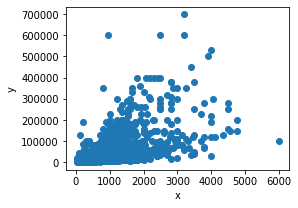

In [ ]:
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(train['Size'],train['Rent'])
ax.plot([1, 2, 4, 50], [1, 2, 4, 50])

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

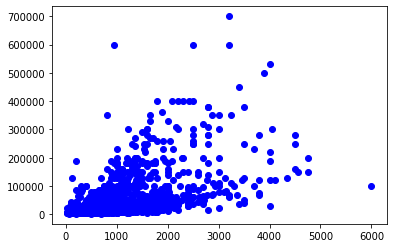

In [ ]:
plt.scatter(x=train['Size'], y=train['Rent'], c ="blue")

In [ ]:
#Average rent and highest average rent
house_pred_df[['City','Rent']].groupby(['City'],as_index=False).mean().sort_values(by='Rent',ascending=False)

,City,Rent
5,Mumbai,85321.204733
2,Delhi,29461.983471
0,Bangalore,24966.365688
1,Chennai,21614.092031
3,Hyderabad,20555.048387
4,Kolkata,11645.173664


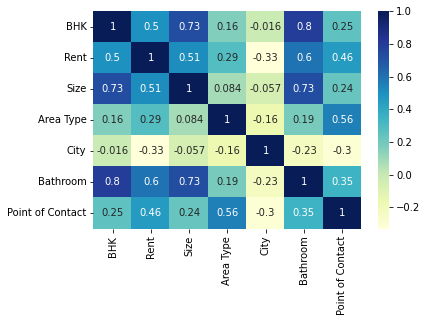

In [ ]:
#Plotting correlation heatmap
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

In [ ]:
list_features = ['BHK',	'Size',	'Floor',	'Area Type',	'City',	'Bathroom',	'Point of Contact']
features = []
for r in range(1,len(list_features)+1):
    for combination in itertools.combinations(list_features, r):
        features.append(list(combination))
print(features)

[['BHK'], ['Size'], ['Floor'], ['Area Type'], ['City'], ['Bathroom'], ['Point of Contact'], ['BHK', 'Size'], ['BHK', 'Floor'], ['BHK', 'Area Type'], ['BHK', 'City'], ['BHK', 'Bathroom'], ['BHK', 'Point of Contact'], ['Size', 'Floor'], ['Size', 'Area Type'], ['Size', 'City'], ['Size', 'Bathroom'], ['Size', 'Point of Contact'], ['Floor', 'Area Type'], ['Floor', 'City'], ['Floor', 'Bathroom'], ['Floor', 'Point of Contact'], ['Area Type', 'City'], ['Area Type', 'Bathroom'], ['Area Type', 'Point of Contact'], ['City', 'Bathroom'], ['City', 'Point of Contact'], ['Bathroom', 'Point of Contact'], ['BHK', 'Size', 'Floor'], ['BHK', 'Size', 'Area Type'], ['BHK', 'Size', 'City'], ['BHK', 'Size', 'Bathroom'], ['BHK', 'Size', 'Point of Contact'], ['BHK', 'Floor', 'Area Type'], ['BHK', 'Floor', 'City'], ['BHK', 'Floor', 'Bathroom'], ['BHK', 'Floor', 'Point of Contact'], ['BHK', 'Area Type', 'City'], ['BHK', 'Area Type', 'Bathroom'], ['BHK', 'Area Type', 'Point of Contact'], ['BHK', 'City', 'Bathroom'

In [ ]:
#Linear Regression based on size
reg = linear_model.LinearRegression()
reg.fit(train[['Size']],train['Rent'])
pred = reg.predict(valid[['Size']])
error = mean_squared_error(valid['Rent'],pred)
print(math.sqrt(error))

134241.21552668116


Text(0, 0.5, 'Rent')

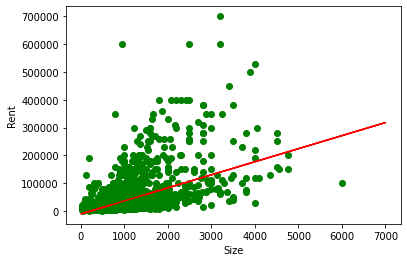

In [ ]:
plt.scatter(train['Size'], train['Rent'],color='g') 
plt.plot(valid['Size'], pred,color='r') 
plt.xlabel("Size")
plt.ylabel("Rent")

In [ ]:
#Function for RMSE
def rmse(pred,actual):
  rm = 0
  for i,j in zip(list(pred),list(actual)):
    rm += (i-j)**2
  rm=rm/len(list(actual))
  return math.sqrt(rm)

In [ ]:
for i in range(0,100,10):
  reg2 = linear_model.LogisticRegression(max_iter=i)
  reg2.fit(train.drop(['Rent'],axis=1),train['Rent'])
  p = reg2.predict(valid.drop(['Rent'],axis=1))
  e = mean_squared_error(valid['Rent'],p)
  print(math.sqrt(e))
#pd.DataFrame({'Actual Rent':valid['Rent'],'Predicted Rent':p})

142877.15558268462
142877.15558268462
142877.15558268462
142877.27223296222
142877.27223296222
142875.7091113298
142878.9519864
142872.61081373153
142837.97903241747
142642.12384168056


In [ ]:
#Linear Regression taking all attributes
model = linear_model.LinearRegression(normalize=True)
model.fit(train.drop(['Rent'],axis=1),train['Rent']) #train[['BHK',	'Size',	'Floor',	'Area Type',	'City',	'Furnishing Status',	'Tenant Preferred',	'Bathroom',	'Point of Contact']]
X_valid = valid.drop(['Rent'],axis=1)
pred = model.predict(X_valid)
error = mean_squared_error(valid['Rent'],pred)
print(math.sqrt(error))
pd.DataFrame({'Actual Rent':valid['Rent'],'Predicted Rent':pred})

133117.0654478449


,Actual Rent,Predicted Rent
1198,13000,18677.279227
3540,19500,733.510354
3177,35000,2379.245858
844,18000,-3537.077741
2245,30000,50636.984060
...,...,...
211,10000,16706.469799
3689,17000,22347.830812
528,12000,32608.448538
2310,9000,11216.322055


In [ ]:
#Linear Regression taking all attributes
model = linear_model.LinearRegression(normalize=True)
model.fit(train.drop(['Rent','Area Type','City'],axis=1),train['Rent']) #train[['BHK',	'Size',	'Floor',	'Area Type',	'City',	'Furnishing Status',	'Tenant Preferred',	'Bathroom',	'Point of Contact']]
X_valid = valid.drop(['Rent','Area Type','City'],axis=1)
pred = model.predict(X_valid)
error = mean_squared_error(valid['Rent'],pred)
print(math.sqrt(error))
pd.DataFrame({'Actual Rent':valid['Rent'],'Predicted Rent':pred})

133311.08192199536


,Actual Rent,Predicted Rent
1198,13000,13928.749463
3540,19500,7776.609019
3177,35000,-6429.524327
844,18000,1320.609920
2245,30000,42190.521960
...,...,...
211,10000,12095.292130
3689,17000,12897.312050
528,12000,21731.610142
2310,9000,11178.563463


In [ ]:
#Linear Regression based on Bathroom
reg = linear_model.LinearRegression()
reg.fit(train[['Bathroom']],train['Rent'])
pred = reg.predict(valid[['Bathroom']])
error = mean_squared_error(valid['Rent'],pred)
print(math.sqrt(error))

136038.2559927807


In [ ]:
#Evaluating best model
best_model_list = []
for i in features:
  reg = linear_model.LinearRegression()
  reg.fit(train[i],train['Rent'])
  pred = reg.predict(valid[i])
  error = math.sqrt(mean_squared_error(valid['Rent'],pred))
  best_model_list.append((error,i))

In [ ]:
sorted(best_model_list)

[(132193.3208384213, ['Size', 'Area Type', 'City', 'Point of Contact']),
 (132280.02047996872, ['Size', 'City', 'Point of Contact']),
 (132354.6162142327,
  ['Size', 'Floor', 'Area Type', 'City', 'Point of Contact']),
 (132426.10173193607, ['Size', 'Floor', 'City', 'Point of Contact']),
 (132446.70391964115, ['Size', 'Area Type', 'Point of Contact']),
 (132543.2047972075, ['Size', 'Point of Contact']),
 (132572.60007505486, ['Size', 'Floor', 'Area Type', 'Point of Contact']),
 (132644.7177762519, ['Size', 'Floor', 'Point of Contact']),
 (132746.3777581642, ['Size', 'Area Type', 'City']),
 (132779.48480752893, ['Size', 'Floor', 'Area Type', 'City']),
 (132962.07642553045,
  ['Size', 'Area Type', 'City', 'Bathroom', 'Point of Contact']),
 (132963.01569800527,
  ['Size', 'Floor', 'Area Type', 'City', 'Bathroom', 'Point of Contact']),
 (132966.01370616615,
  ['BHK', 'Size', 'Area Type', 'City', 'Point of Contact']),
 (133004.3864991708,
  ['BHK', 'Size', 'Floor', 'Area Type', 'City', 'Poin

In [ ]:
model1 = linear_model.LinearRegression()
model1.fit(train[['BHK', 'Size', 'Floor', 'City', 'Bathroom', 'Point of Contact']],train['Rent'])
pred = model1.predict(test[['BHK', 'Size', 'Floor', 'City', 'Bathroom', 'Point of Contact']])
error = math.sqrt(mean_squared_error(test['Rent'],pred))
print(error)

52401.8347764398


In [ ]:
model2 = linear_model.LinearRegression()
model2.fit(train[['Size', 'Floor', 'City', 'Bathroom', 'Point of Contact']],train['Rent'])
pred = model2.predict(test[['Size', 'Floor', 'City', 'Bathroom', 'Point of Contact']])
error = math.sqrt(mean_squared_error(test['Rent'],pred))
print(error)

52530.04284857642


In [ ]:
model3 = linear_model.LinearRegression()
model3.fit(train[['Size', 'Floor', 'Area Type', 'City', 'Bathroom', 'Point of Contact']],train['Rent'])
pred = model3.predict(test[['Size', 'Floor', 'Area Type', 'City', 'Bathroom', 'Point of Contact']])
error = math.sqrt(mean_squared_error(test['Rent'],pred))
print(error)

52477.957777650314


In [ ]:
list_features = ['BHK',	'Rent',	'Size',	'Floor',	'Area Type',	'City',	'Bathroom',	'Point of Contact']
features = []
for r in range(1,len(list_features)+1):
    for combination in itertools.combinations(list_features, r):
        features.append(list(combination))
print(features)

[['BHK'], ['Rent'], ['Size'], ['Floor'], ['Area Type'], ['City'], ['Bathroom'], ['Point of Contact'], ['BHK', 'Rent'], ['BHK', 'Size'], ['BHK', 'Floor'], ['BHK', 'Area Type'], ['BHK', 'City'], ['BHK', 'Bathroom'], ['BHK', 'Point of Contact'], ['Rent', 'Size'], ['Rent', 'Floor'], ['Rent', 'Area Type'], ['Rent', 'City'], ['Rent', 'Bathroom'], ['Rent', 'Point of Contact'], ['Size', 'Floor'], ['Size', 'Area Type'], ['Size', 'City'], ['Size', 'Bathroom'], ['Size', 'Point of Contact'], ['Floor', 'Area Type'], ['Floor', 'City'], ['Floor', 'Bathroom'], ['Floor', 'Point of Contact'], ['Area Type', 'City'], ['Area Type', 'Bathroom'], ['Area Type', 'Point of Contact'], ['City', 'Bathroom'], ['City', 'Point of Contact'], ['Bathroom', 'Point of Contact'], ['BHK', 'Rent', 'Size'], ['BHK', 'Rent', 'Floor'], ['BHK', 'Rent', 'Area Type'], ['BHK', 'Rent', 'City'], ['BHK', 'Rent', 'Bathroom'], ['BHK', 'Rent', 'Point of Contact'], ['BHK', 'Size', 'Floor'], ['BHK', 'Size', 'Area Type'], ['BHK', 'Size', 'Ci